In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler




# Normalización

- Pregunta teórica: Podríais explicar en pocas palabras ¿Qué es lo que hace exactamente el método boxcox de normalización de datos?

Boxcox es una función de SciPy que normaliza nuestros datos con una transformación logarítmica. Lo que hace es acortar las diferencias de los valores más grandes y aumenta las diferencias entre los valores más pequeños para poder compararlos al conseguir estar en la misma escala. Estas transformaciones las hace a través de lambda: calcula el mejor lambda para que esta transformación ocurra. Su valor suele ser entre -5 y +5.

In [2]:
df = pd.read_csv("pairs_limpieza.csv", index_col = 0)
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,fatal_N,fatal_Unknown,fatal_Y,age_jovenes,age_adultos,age_ancianos,type.1,species_.1,fecha_limpia.1
0,2018,Boating,usa,57.0,White shark,Jun,N,F,1,-100.445882,1,0,0,0,1,0,1,4,7
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,1,-100.445882,1,0,0,1,0,0,7,3,7


Cambiamos la columna age a int para poder realizar mejor las graficas

In [3]:
df['age'] = df['age'].astype('int64', copy = True, errors = 'raise')

In [4]:
df["age"].unique()

array([57, 11, 48, 27, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54,
       41, 37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 40, 28, 20, 24, 26,
       49, 22,  7, 31, 17, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58,
       47, 61, 65, 36, 66, 43,  9, 72, 59,  6, 64, 23, 71, 44, 62, 63, 70,
       53, 77, 74,  5, 86, 84, 75, 87, 67,  1,  2, 81, 78])

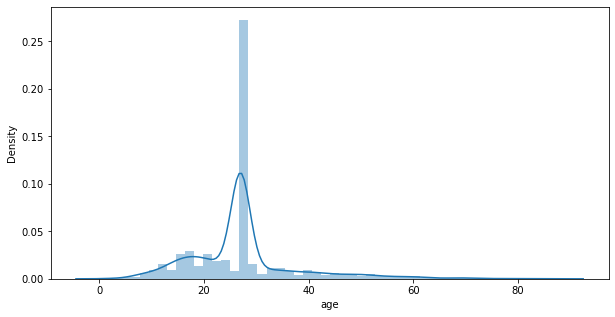

In [5]:
fig = plt.subplots(figsize = (10,5))
sns.distplot(df['age']);

Vemos en la gráfica que nuestros datos **columna age** no tienen una distribución normal por lo que vamos a a proceder a normalización, en vez de estandarización. Así, transformaremos nuestros datos a una escala común para poder compararlos.

In [6]:
df.dtypes

year               int64
type              object
country           object
age                int64
species_          object
fecha_limpia      object
fatal             object
sex               object
latitud            int64
longitud          object
fatal_N            int64
fatal_Unknown      int64
fatal_Y            int64
age_jovenes        int64
age_adultos        int64
age_ancianos       int64
type.1             int64
species_.1         int64
fecha_limpia.1     int64
dtype: object

Las únicas columnas numéricas son *year* y *age*, por lo tanto son las únicas candidatas a ser normalizadas. Vamos a normalizar la columna *age* que es la única que tiene sentido hacerlo.

- Vamos a comenzar con la normalización **MANUAL**

In [7]:
min = df["age"].min()
max =df["age"].max()
media = df["age"].mean()

In [8]:
df["age_n_manual"] = (df["age"] - media) / (max - min)

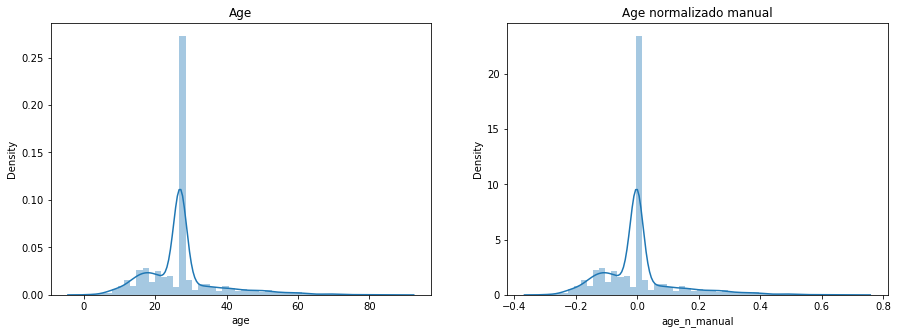

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age')
axes[1].set_title('Age normalizado manual')
sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_n_manual'], ax = axes[1]);

Observamos como ya la nueva columna age tiene sus valores en una escala entre 0-1, más común para poder compararla más facilmente.

- Normalización **LOGARÍTMICA**

In [10]:
df["age_n_log"] = df["age"].apply(lambda x: np.log(x) if x != 0 else 0)

In [11]:
df["age_n_log"]

0       4.043051
1       2.397895
2       3.871201
3       3.295837
4       3.295837
          ...   
6213    3.295837
6214    3.295837
6215    3.295837
6216    3.295837
6217    2.708050
Name: age_n_log, Length: 6218, dtype: float64

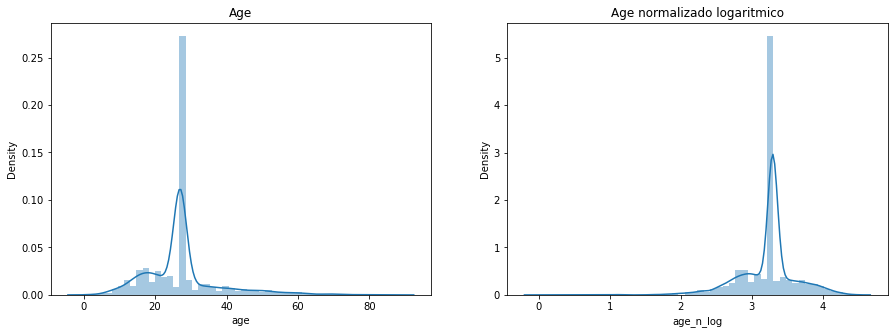

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age')
axes[1].set_title('Age normalizado logaritmico')
sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_n_log'], ax = axes[1]);

Normalización **RAÍZ CUADRADA**

In [13]:
df["age_n_raiz"] = df["age"].apply(lambda x: math.sqrt(x))

In [14]:
df["age_n_raiz"]

0       7.549834
1       3.316625
2       6.928203
3       5.196152
4       5.196152
          ...   
6213    5.196152
6214    5.196152
6215    5.196152
6216    5.196152
6217    3.872983
Name: age_n_raiz, Length: 6218, dtype: float64

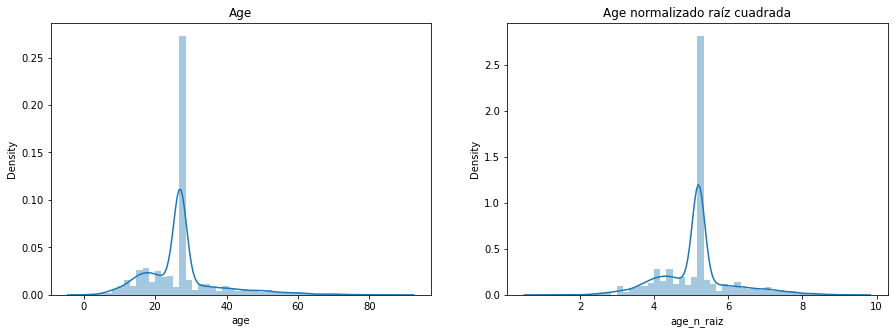

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age')
axes[1].set_title('Age normalizado raíz cuadrada')
sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_n_raiz'], ax = axes[1]);

Normalización **BOXCOX**

In [16]:
df["age_n_box"], lambda_ajustada = stats.boxcox(df["age"])

In [17]:
lambda_ajustada

0.35942131224514967

Podemos observar que el valor de la lamba está entre -5 y 5.

In [18]:
df["age_n_box"]

0       9.116327
1       3.804860
2       8.403629
3       6.313925
4       6.313925
          ...   
6213    6.313925
6214    6.313925
6215    6.313925
6216    6.313925
6217    4.581659
Name: age_n_box, Length: 6218, dtype: float64

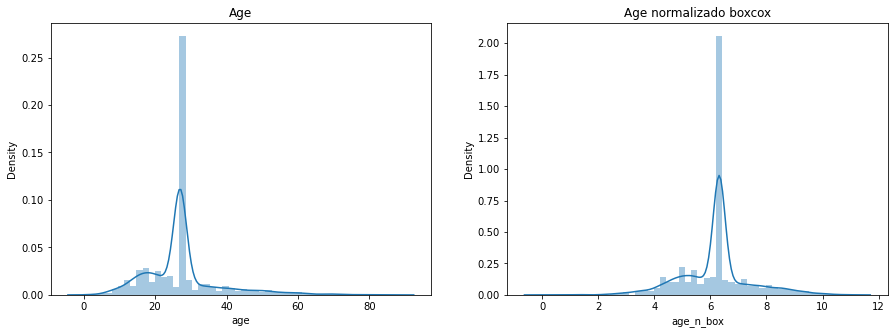

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age')
axes[1].set_title('Age normalizado boxcox')
sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_n_box'], ax = axes[1]);

Normalización **MINMAXSCALLER**

Como el método MinMax no admite 1D, convertimos los valores de nuestra columna a 2D con el método reshape estudiado anteriormente.

In [20]:
age_n = df['age'].values.reshape(-1, 1)
age_n

array([[57],
       [11],
       [48],
       ...,
       [27],
       [27],
       [15]])

In [21]:
minmaxscaler = MinMaxScaler(feature_range=(0,1))

In [22]:
minmaxscaler.fit(age_n)

MinMaxScaler()

In [23]:
X_normalizadas = minmaxscaler.transform(age_n)

In [24]:
df['age_minmax'] = pd.DataFrame(X_normalizadas)

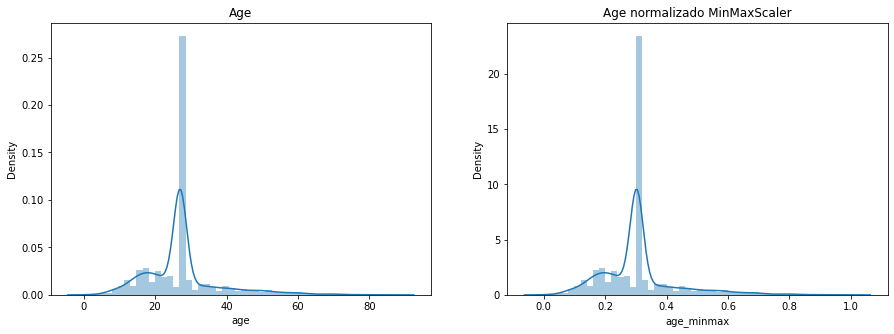

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Age')
axes[1].set_title('Age normalizado MinMaxScaler')
sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_minmax'], ax = axes[1]);

Comprobamos que se han guardado las columnas en el DF.

In [26]:
df.head()

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,...,age_adultos,age_ancianos,type.1,species_.1,fecha_limpia.1,age_n_manual,age_n_log,age_n_raiz,age_n_box,age_minmax
0,2018,Boating,usa,57,White shark,Jun,N,F,1,-100.445882,...,1,0,1,4,7,0.346937,4.043051,7.549834,9.116327,0.651163
1,2018,Unprovoked,usa,11,Unespecific,Jun,N,F,1,-100.445882,...,0,0,7,3,7,-0.187946,2.397895,3.316625,3.804860,0.116279
2,2018,Invalid,usa,48,Unespecific,Jun,N,M,1,-100.445882,...,1,0,3,3,7,0.242286,3.871201,6.928203,8.403629,0.546512
3,2018,Unprovoked,australia,27,Unespecific,Jun,N,M,0,134.755,...,0,0,7,3,7,-0.001900,3.295837,5.196152,6.313925,0.302326
4,2018,Provoked,mexico,27,Tiger shark,Jun,N,M,1,-102.0077097,...,0,0,4,2,7,-0.001900,3.295837,5.196152,6.313925,0.302326


Guardad el csv con los cambios

In [27]:
df.to_csv("pairs_limpieza.csv")